##YOLO

In [1]:
!pip install torch torchvision torchaudio
!pip install ultralytics
!pip install roboflow
!pip install opencv-python-headless
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import ultralytics
print(ultralytics.__version__)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.100


In [3]:
!pip install roboflow

In [4]:
import os
import shutil
import random
from roboflow import Roboflow

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="SSNLoLCwToPfhL2EZqUK")
project = rf.workspace("cm-h8pey").project("biensoxe_ver2")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BienSoXe_ver2-1 in yolov11:: 100%|██████████| 19802/19802 [00:03<00:00, 5667.70it/s]


## Huấn luyện mô hình lần 1

In [6]:
#đếm các ảnh trong images của các file test, train, valid

import os

def count_images(directory):
  """Counts the number of image files in a directory."""
  image_count = 0
  for filename in os.listdir(directory):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
      image_count += 1
  return image_count

train_dir = os.path.join(dataset.location, "train", "images")
test_dir = os.path.join(dataset.location, "test", "images")
valid_dir = os.path.join(dataset.location, "valid", "images")


train_image_count = count_images(train_dir)
test_image_count = count_images(test_dir)
valid_image_count = count_images(valid_dir)

print(f"Number of training images: {train_image_count}")
print(f"Number of testing images: {test_image_count}")
print(f"Number of validation images: {valid_image_count}")



Number of training images: 7916
Number of testing images: 989
Number of validation images: 990


In [9]:
with open("/content/BienSoXe_ver2-1/data.yaml", "r") as f:
    print(f.read())


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['bsx']

roboflow:
  workspace: cm-h8pey
  project: biensoxe_ver2
  version: 1
  license: Public Domain
  url: https://universe.roboflow.com/cm-h8pey/biensoxe_ver2/dataset/1


In [11]:
from ultralytics import YOLO

# Tải mô hình YOLOv11 pre-trained
model = YOLO("/content/yolo11n.pt")

# Huấn luyện mô hình
results = model.train(data="/content/BienSoXe_ver2-1/data.yaml", epochs=50, imgsz=640)


Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo11n.pt, data=/content/BienSoXe_ver2-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 130MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/BienSoXe_ver2-1/train/labels... 7916 images, 0 backgrounds, 1 corrupt: 100%|██████████| 7916/7916 [00:03<00:00, 2436.75it/s]

train: WARNING ⚠️ /content/BienSoXe_ver2-1/train/images/noisy_0214_04674_b_jpg.rf.7ab77004c5bc6bf3e2baee23d30d458c.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0


train: New cache created: /content/BienSoXe_ver2-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/BienSoXe_ver2-1/valid/labels... 990 images, 0 backgrounds, 0 corrupt: 100%|██████████| 990/990 [00:00<00:00, 1030.54it/s]

val: New cache created: /content/BienSoXe_ver2-1/valid/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.31G       0.67      1.093     0.9415         13        640: 100%|██████████| 495/495 [02:32<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.12it/s]


                   all        990        990      0.998      0.999      0.995      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.71G     0.6535     0.4722     0.9512         21        640: 100%|██████████| 495/495 [02:25<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.46it/s]

                   all        990        990      0.997      0.995      0.995      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.72G     0.6491     0.4091      0.961         15        640: 100%|██████████| 495/495 [02:27<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.55it/s]

                   all        990        990      0.999          1      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.73G     0.6357     0.3736     0.9531         14        640: 100%|██████████| 495/495 [02:31<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.81it/s]

                   all        990        990          1          1      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.75G     0.6131     0.3456     0.9526         23        640: 100%|██████████| 495/495 [02:31<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.51it/s]

                   all        990        990          1          1      0.995      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.76G     0.6073     0.3367     0.9502         17        640: 100%|██████████| 495/495 [02:29<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.50it/s]

                   all        990        990          1      0.998      0.995      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.78G     0.5954      0.329     0.9432         24        640: 100%|██████████| 495/495 [02:27<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.51it/s]

                   all        990        990          1          1      0.995      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.79G     0.5934     0.3215     0.9476         22        640: 100%|██████████| 495/495 [02:29<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.64it/s]

                   all        990        990          1          1      0.995       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.81G     0.5909     0.3127     0.9462         21        640: 100%|██████████| 495/495 [02:28<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.75it/s]

                   all        990        990          1      0.999      0.995       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.82G      0.572     0.3014     0.9374         14        640: 100%|██████████| 495/495 [02:29<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.65it/s]

                   all        990        990      0.999          1      0.995      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.84G     0.5793     0.3038     0.9419         20        640: 100%|██████████| 495/495 [02:30<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.48it/s]

                   all        990        990          1      0.994      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.85G     0.5709     0.3015     0.9403         21        640: 100%|██████████| 495/495 [02:28<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.42it/s]

                   all        990        990          1          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.87G     0.5677     0.2938     0.9387         18        640: 100%|██████████| 495/495 [02:31<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.66it/s]

                   all        990        990          1          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.88G     0.5558     0.2855     0.9373         23        640: 100%|██████████| 495/495 [02:30<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.48it/s]

                   all        990        990          1      0.999      0.995      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       2.9G     0.5514     0.2826     0.9362         21        640: 100%|██████████| 495/495 [02:27<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.45it/s]

                   all        990        990          1      0.999      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.91G     0.5519     0.2767     0.9338         20        640: 100%|██████████| 495/495 [02:27<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.37it/s]

                   all        990        990          1          1      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.93G     0.5538     0.2786     0.9348          9        640: 100%|██████████| 495/495 [02:28<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.50it/s]

                   all        990        990      0.999          1      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.94G     0.5448     0.2721     0.9307         11        640: 100%|██████████| 495/495 [02:25<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.51it/s]

                   all        990        990          1          1      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.96G     0.5458     0.2745     0.9367         15        640: 100%|██████████| 495/495 [02:22<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.58it/s]

                   all        990        990          1          1      0.995      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.97G     0.5427     0.2685     0.9352         22        640: 100%|██████████| 495/495 [02:24<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.45it/s]

                   all        990        990          1          1      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.99G     0.5431     0.2691     0.9351         17        640: 100%|██████████| 495/495 [02:25<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.49it/s]

                   all        990        990          1      0.999      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         3G     0.5392     0.2627      0.931         18        640: 100%|██████████| 495/495 [02:25<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.46it/s]

                   all        990        990          1          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.02G     0.5395     0.2635     0.9334         10        640: 100%|██████████| 495/495 [02:25<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.61it/s]

                   all        990        990      0.999          1      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.03G     0.5358     0.2618     0.9309         18        640: 100%|██████████| 495/495 [02:23<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.74it/s]

                   all        990        990          1          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.04G     0.5298     0.2577     0.9296         15        640: 100%|██████████| 495/495 [02:27<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.90it/s]

                   all        990        990          1      0.999      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.06G     0.5281     0.2535     0.9279         23        640: 100%|██████████| 495/495 [02:26<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        990        990          1          1      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.07G     0.5246     0.2542     0.9286         21        640: 100%|██████████| 495/495 [02:22<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.96it/s]

                   all        990        990          1          1      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.09G     0.5231     0.2527     0.9255         20        640: 100%|██████████| 495/495 [02:24<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.68it/s]

                   all        990        990          1          1      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       3.1G     0.5229     0.2493     0.9286         14        640: 100%|██████████| 495/495 [02:26<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.66it/s]

                   all        990        990          1          1      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.12G     0.5231     0.2483     0.9249         14        640: 100%|██████████| 495/495 [02:26<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.98it/s]

                   all        990        990          1      0.999      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.13G      0.523     0.2487     0.9301         17        640: 100%|██████████| 495/495 [02:24<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.77it/s]

                   all        990        990          1      0.999      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.15G     0.5141     0.2399     0.9209         16        640: 100%|██████████| 495/495 [02:24<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.51it/s]

                   all        990        990          1          1      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.16G     0.5167     0.2411     0.9264         15        640: 100%|██████████| 495/495 [02:23<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.25it/s]

                   all        990        990      0.999          1      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.18G     0.5141     0.2415     0.9208         14        640: 100%|██████████| 495/495 [02:23<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.50it/s]

                   all        990        990          1      0.999      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.19G     0.5117     0.2384     0.9251         17        640: 100%|██████████| 495/495 [02:22<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.58it/s]

                   all        990        990          1          1      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.21G     0.5094     0.2361      0.923         18        640: 100%|██████████| 495/495 [02:21<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        990        990          1          1      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.22G     0.5079     0.2346     0.9226         19        640: 100%|██████████| 495/495 [02:24<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        990        990          1          1      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.24G     0.5111     0.2344     0.9238         16        640: 100%|██████████| 495/495 [02:25<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.10it/s]

                   all        990        990          1          1      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.25G     0.5079     0.2339     0.9249         19        640: 100%|██████████| 495/495 [02:26<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.96it/s]

                   all        990        990          1          1      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.27G     0.5033     0.2309     0.9202         19        640: 100%|██████████| 495/495 [02:25<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.94it/s]

                   all        990        990          1          1      0.995      0.924


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.28G     0.4721     0.2013     0.9181         11        640: 100%|██████████| 495/495 [02:20<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.48it/s]

                   all        990        990          1          1      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       3.3G     0.4703     0.1975     0.9209         11        640: 100%|██████████| 495/495 [02:20<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.55it/s]

                   all        990        990          1          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.31G     0.4685     0.1976     0.9234         11        640: 100%|██████████| 495/495 [02:17<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.63it/s]

                   all        990        990          1          1      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.33G     0.4659     0.1964     0.9199         11        640: 100%|██████████| 495/495 [02:17<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.01it/s]

                   all        990        990          1          1      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.34G     0.4639     0.1906     0.9183         11        640: 100%|██████████| 495/495 [02:18<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.57it/s]

                   all        990        990          1          1      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.36G     0.4624     0.1923     0.9173         11        640: 100%|██████████| 495/495 [02:17<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.55it/s]

                   all        990        990          1          1      0.995      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.37G     0.4606     0.1887     0.9164         11        640: 100%|██████████| 495/495 [02:19<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.55it/s]

                   all        990        990          1          1      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.38G     0.4577     0.1845     0.9144         11        640: 100%|██████████| 495/495 [02:19<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.60it/s]

                   all        990        990          1          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       3.4G     0.4568     0.1827     0.9117         11        640: 100%|██████████| 495/495 [02:21<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.48it/s]

                   all        990        990          1          1      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.42G     0.4549     0.1797     0.9095         11        640: 100%|██████████| 495/495 [02:20<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.04it/s]

                   all        990        990          1          1      0.995      0.928



50 epochs completed in 2.142 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  2.91it/s]


                   all        990        990          1          1      0.995      0.929
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train3


In [12]:
#zip folder /content/runs và tải về máy

from google.colab import files
import shutil

# Create a zip file of the folder
shutil.make_archive("/content/runs", 'zip', "/content/runs")

# Download the zip file
files.download("/content/runs.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


image 1/1 /content/xemay.jpg: 448x640 3 bsxs, 75.5ms
Speed: 3.4ms preprocess, 75.5ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


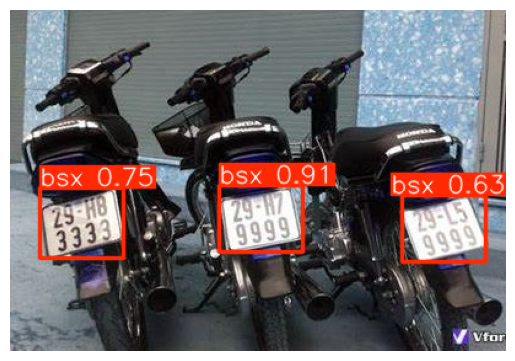

In [14]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Tải mô hình đã huấn luyện
model = YOLO("/content/runs/detect/train3/weights/best.pt")

# Dự đoán trên một ảnh
image_path = "/content/xemay.jpg"
results = model(image_path)

# Hiển thị ảnh với bounding box
result_img = results[0].plot()
plt.imshow(result_img)
plt.axis('off')
plt.show()



0: 640x640 2 bsxs, 9.1ms
Speed: 2.6ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


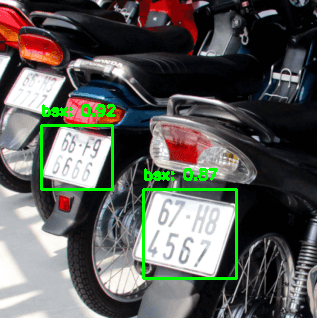

In [15]:
from google.colab.patches import cv2_imshow

# Tải mô hình đã huấn luyện
model = YOLO("/content/runs/detect/train3/weights/best.pt")
# Đọc ảnh từ file (có thể thay thế bằng đường dẫn ảnh của bạn)
image_path = "/content/xemay_1.png"
image = cv2.imread(image_path)

# Dự đoán đối tượng trong ảnh
results = model(image)

# Truy xuất các kết quả
for result in results:
    # Lấy các bounding boxes
    boxes = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
    names = [result.names[cls.item()] for cls in result.boxes.cls.int()]  # Tên các lớp
    confs = result.boxes.conf  # Điểm tin cậy của mỗi box

    # Vẽ các bounding boxes lên ảnh
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = box
        label = f"{names[i]}: {confs[i]:.2f}"  # Tên đối tượng và độ tin cậy
        color = (0, 255, 0)  # Màu xanh cho các hộp

        # Vẽ rectangle và thêm label
        image = cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
        image = cv2.putText(image, label, (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Hiển thị ảnh đã vẽ bounding boxes
cv2_imshow(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [16]:
import cv2
import os
from ultralytics import YOLO

# Định nghĩa hàm để cắt ảnh biển số xe từ mô hình YOLO
def crop_license_plates(input_dir, output_dir, model):
    # Tạo thư mục lưu ảnh nếu chưa có
    os.makedirs(output_dir, exist_ok=True)

    # Lặp qua tất cả các ảnh trong thư mục input_dir
    for filename in os.listdir(input_dir):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Kiểm tra định dạng ảnh
            img_path = os.path.join(input_dir, filename)

            # Đọc ảnh
            img = cv2.imread(img_path)

            # Dự đoán với mô hình YOLO
            results = model(img)

            # Kiểm tra số lượng bounding boxes được phát hiện
            detected_count = len(results[0].boxes)  # Sử dụng .boxes thay vì .xyxy
            if detected_count == 0:
                print(f"Không phát hiện biển số trong ảnh: {filename}")
            else:
                print(f"Phát hiện {detected_count} biển số trong ảnh: {filename}")

                # Lấy các bounding boxes và cắt ảnh biển số xe
                for i, result in enumerate(results[0].boxes):  # Kết quả của ảnh đầu tiên trong batch
                    # Lấy tọa độ bounding box và chuyển thành list
                    coords = result.xyxy.tolist()[0]  # Convert tensor to list and access the first element

                    # Gán giá trị của bounding box
                    xmin, ymin, xmax, ymax = map(int, coords)

                    # Cắt ảnh biển số xe
                    cropped_img = img[ymin:ymax, xmin:xmax]

                    # Tạo tên file ảnh cắt
                    output_filename = f"{os.path.splitext(filename)[0]}_cropped_{i}.jpg"
                    output_path = os.path.join(output_dir, output_filename)

                    # Lưu ảnh đã cắt
                    cv2.imwrite(output_path, cropped_img)
                    print(f"Đã lưu ảnh biển số xe tại: {output_path}")
    print("ĐÃ CẮT ẢNH XONG")

# Sử dụng hàm với dữ liệu của bạn
input_dir = '/content/BienSoXe_ver2-1/test/images'  # Thư mục chứa ảnh test
output_dir = '/content/cropped_images/'  # Thư mục lưu ảnh đã cắt
model = YOLO("/content/runs/detect/train3/weights/best.pt")  # Tải mô hình YOLO đã huấn luyện

# Gọi hàm để cắt ảnh
crop_license_plates(input_dir, output_dir, model)



0: 640x640 1 bsx, 12.9ms
Speed: 2.2ms preprocess, 12.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Phát hiện 1 biển số trong ảnh: noisy_0505_04300_b_jpg.rf.71ccfecf29189a6816fadad4679b0c2e.jpg
Đã lưu ảnh biển số xe tại: /content/cropped_images/noisy_0505_04300_b_jpg.rf.71ccfecf29189a6816fadad4679b0c2e_cropped_0.jpg

0: 640x640 1 bsx, 15.2ms
Speed: 7.2ms preprocess, 15.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Phát hiện 1 biển số trong ảnh: flipped_0128_02532_b_jpg.rf.541962f344f366320a0f43a9c7aa5376.jpg
Đã lưu ảnh biển số xe tại: /content/cropped_images/flipped_0128_02532_b_jpg.rf.541962f344f366320a0f43a9c7aa5376_cropped_0.jpg

0: 640x640 1 bsx, 18.8ms
Speed: 2.6ms preprocess, 18.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Phát hiện 1 biển số trong ảnh: rotated_0514_06714_b_jpg.rf.708a48e7210abd0fa186e8c8aae41664.jpg
Đã lưu ảnh biển số xe tại: /content/cropped_images/rotated_0514_06714_b_jpg.rf.708a48e7210abd0f

In [18]:
import cv2
import os
from ultralytics import YOLO

# Định nghĩa hàm để cắt ảnh biển số xe từ mô hình YOLO
def crop_license_plates(input_dir, output_dir, model):
    # Tạo thư mục lưu ảnh nếu chưa có
    os.makedirs(output_dir, exist_ok=True)

    # Lặp qua tất cả các ảnh trong thư mục input_dir
    for filename in os.listdir(input_dir):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Kiểm tra định dạng ảnh
            img_path = os.path.join(input_dir, filename)

            # Đọc ảnh
            img = cv2.imread(img_path)

            # Dự đoán với mô hình YOLO
            results = model(img)

            # Kiểm tra số lượng bounding boxes được phát hiện
            detected_count = len(results[0].boxes)  # Sử dụng .boxes thay vì .xyxy
            if detected_count == 0:
                print(f"Không phát hiện biển số trong ảnh: {filename}")
            else:
                print(f"Phát hiện {detected_count} biển số trong ảnh: {filename}")

                # Lấy các bounding boxes và cắt ảnh biển số xe
                for i, result in enumerate(results[0].boxes):  # Kết quả của ảnh đầu tiên trong batch
                    # Lấy tọa độ bounding box và chuyển thành list
                    coords = result.xyxy.tolist()[0]  # Convert tensor to list and access the first element

                    # Gán giá trị của bounding box
                    xmin, ymin, xmax, ymax = map(int, coords)

                    # Cắt ảnh biển số xe
                    cropped_img = img[ymin:ymax, xmin:xmax]

                    # Tạo tên file ảnh cắt
                    output_filename = f"{os.path.splitext(filename)[0]}_cropped_{i}.jpg"
                    output_path = os.path.join(output_dir, output_filename)

                    # Lưu ảnh đã cắt
                    cv2.imwrite(output_path, cropped_img)
                    print(f"Đã lưu ảnh biển số xe tại: {output_path}")
    print("ĐÃ CẮT ẢNH XONG")

# Sử dụng hàm với dữ liệu của bạn
input_dir = '/content/BienSoXe_ver2-1/train/images'
output_dir = '/content/cropped_images_train/'  # Thư mục lưu ảnh đã cắt
model = YOLO("/content/runs/detect/train3/weights/best.pt")  # Tải mô hình YOLO đã huấn luyện

# Gọi hàm để cắt ảnh
crop_license_plates(input_dir, output_dir, model)


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
0: 640x640 1 bsx, 16.4ms
Speed: 2.5ms preprocess, 16.4ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)
Phát hiện 1 biển số trong ảnh: rotated_0126_06297_b_jpg.rf.c358f7548269a09586c49d5aa0d9b602.jpg
Đã lưu ảnh biển số xe tại: /content/cropped_images_train/rotated_0126_06297_b_jpg.rf.c358f7548269a09586c49d5aa0d9b602_cropped_0.jpg

0: 640x640 1 bsx, 21.6ms
Speed: 2.6ms preprocess, 21.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Phát hiện 1 biển số trong ảnh: blurred_0422_06869_b_jpg.rf.7618700baae314e7fdf7ab1e9ec43812.jpg
Đã lưu ảnh biển số xe tại: /content/cropped_images_train/blurred_0422_06869_b_jpg.rf.7618700baae314e7fdf7ab1e9ec43812_cropped_0.jpg

0: 640x640 1 bsx, 22.0ms
Speed: 2.7ms preprocess, 22.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Phát hiện 1 biển số trong ảnh: flipped_0126_06297_b_jpg.rf.dc84996bd007b90e46e3c0cacc784e37.jpg
Đã lưu ảnh biển số xe t

In [23]:
import cv2
import os
from ultralytics import YOLO

# Định nghĩa hàm để cắt ảnh biển số xe từ mô hình YOLO
def crop_license_plates(input_dir, output_dir, model):
    # Tạo thư mục lưu ảnh nếu chưa có
    os.makedirs(output_dir, exist_ok=True)

    # Lặp qua tất cả các ảnh trong thư mục input_dir
    for filename in os.listdir(input_dir):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Kiểm tra định dạng ảnh
            img_path = os.path.join(input_dir, filename)

            # Đọc ảnh
            img = cv2.imread(img_path)

            # Dự đoán với mô hình YOLO
            results = model(img)

            # Kiểm tra số lượng bounding boxes được phát hiện
            detected_count = len(results[0].boxes)  # Sử dụng .boxes thay vì .xyxy
            if detected_count == 0:
                print(f"Không phát hiện biển số trong ảnh: {filename}")
            else:
                print(f"Phát hiện {detected_count} biển số trong ảnh: {filename}")

                # Lấy các bounding boxes và cắt ảnh biển số xe
                for i, result in enumerate(results[0].boxes):  # Kết quả của ảnh đầu tiên trong batch
                    # Lấy tọa độ bounding box và chuyển thành list
                    coords = result.xyxy.tolist()[0]  # Convert tensor to list and access the first element

                    # Gán giá trị của bounding box
                    xmin, ymin, xmax, ymax = map(int, coords)

                    # Cắt ảnh biển số xe
                    cropped_img = img[ymin:ymax, xmin:xmax]

                    # Tạo tên file ảnh cắt
                    output_filename = f"{os.path.splitext(filename)[0]}_cropped_{i}.jpg"
                    output_path = os.path.join(output_dir, output_filename)

                    # Lưu ảnh đã cắt
                    cv2.imwrite(output_path, cropped_img)
                    print(f"Đã lưu ảnh biển số xe tại: {output_path}")
    print("ĐÃ CẮT ẢNH XONG")

# Sử dụng hàm với dữ liệu của bạn
input_dir = '/content/BienSoXe_ver2-1/valid/images'
output_dir = '/content/cropped_images_valid/'  # Thư mục lưu ảnh đã cắt
model = YOLO("/content/runs/detect/train3/weights/best.pt")  # Tải mô hình YOLO đã huấn luyện

# Gọi hàm để cắt ảnh
crop_license_plates(input_dir, output_dir, model)



0: 640x640 1 bsx, 11.7ms
Speed: 2.2ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Phát hiện 1 biển số trong ảnh: rotated_0240_02213_b_jpg.rf.c8a6cac57b333e5b6f9583ea18865c6a.jpg
Đã lưu ảnh biển số xe tại: /content/cropped_images_valid/rotated_0240_02213_b_jpg.rf.c8a6cac57b333e5b6f9583ea18865c6a_cropped_0.jpg

0: 640x640 1 bsx, 11.1ms
Speed: 2.4ms preprocess, 11.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Phát hiện 1 biển số trong ảnh: rotated_0427_01058_b_jpg.rf.084f78fb8515de46e70780cbe8e41ccf.jpg
Đã lưu ảnh biển số xe tại: /content/cropped_images_valid/rotated_0427_01058_b_jpg.rf.084f78fb8515de46e70780cbe8e41ccf_cropped_0.jpg

0: 640x640 1 bsx, 9.2ms
Speed: 2.4ms preprocess, 9.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Phát hiện 1 biển số trong ảnh: noisy_0112_01081_b_jpg.rf.d8fb52c6db16d672122d643392688195.jpg
Đã lưu ảnh biển số xe tại: /content/cropped_images_valid/noisy_0112_01081_b_jpg.rf.

In [24]:
import os

# Kiểm tra xem thư mục đã lưu ảnh có bị rỗng hay không
cropped_images_path = '/content/cropped_images_test/'

# In ra danh sách các tệp trong thư mục
files_in_cropped_images = os.listdir(cropped_images_path)
print(f"Tất cả các tệp trong thư mục {cropped_images_path}: {files_in_cropped_images}")

# Kiểm tra nếu thư mục rỗng
if len(files_in_cropped_images) == 0:
    print("Thư mục cropped_images hiện tại rỗng.")
else:
    print(f"Thư mục cropped_images chứa {len(files_in_cropped_images)} tệp.")


Tất cả các tệp trong thư mục /content/cropped_images_test/: ['flipped_0205_04086_b_jpg.rf.2bdceb149ec688fcadc5c9acf6c99bf9_cropped_0.jpg', 'contrasted_0110_01670_b_jpg.rf.713ed1a8c786ec7d31ab6394f0b24e94_cropped_0.jpg', 'noisy_0302_08233_b_jpg.rf.82cd5d0c15e7e99f8e15a799af2d7015_cropped_0.jpg', 'rotated_0448_08176_b_jpg.rf.e693d31f0586aa97d9be23e050e44b2c_cropped_0.jpg', 'blurred_0510_07155_b_jpg.rf.d98c9f8416f6d0d17d3f22c28ca6fa09_cropped_0.jpg', 'flipped_0512_06410_b_jpg.rf.783eb633efe0966762cc54357e18d905_cropped_0.jpg', 'blurred_0205_07100_b_jpg.rf.548d9290ab0f2c9687102f58066a12e8_cropped_0.jpg', 'original_0433_04797_b_jpg.rf.53ca5b7bd6205b10128d0f1183e92cb7_cropped_0.jpg', 'original_0323_06647_b_jpg.rf.954b71e010a8c6b2829bf8eb69a1abf0_cropped_0.jpg', 'noisy_0509_01945_b_jpg.rf.15d50addbb50fa56dab42b4464bc414c_cropped_0.jpg', 'blurred_0131_00436_b_jpg.rf.cedd67d7b4e2f400262d2fb8e2ade0c8_cropped_0.jpg', 'rotated_0115_01928_b_jpg.rf.8063afacc7fe5080e281990626a13d6b_cropped_0.jpg', 'r

In [25]:
import os

# Kiểm tra xem thư mục đã lưu ảnh có bị rỗng hay không
cropped_images_path = '/content/cropped_images_train/'

# In ra danh sách các tệp trong thư mục
files_in_cropped_images = os.listdir(cropped_images_path)
print(f"Tất cả các tệp trong thư mục {cropped_images_path}: {files_in_cropped_images}")

# Kiểm tra nếu thư mục rỗng
if len(files_in_cropped_images) == 0:
    print("Thư mục cropped_images hiện tại rỗng.")
else:
    print(f"Thư mục cropped_images chứa {len(files_in_cropped_images)} tệp.")


Tất cả các tệp trong thư mục /content/cropped_images_train/: ['flipped_0121_06062_b_jpg.rf.56034e1badbce4ca1320b25ac8c63647_cropped_0.jpg', 'contrasted_0254_05925_b_jpg.rf.eb8d695588d11b2903756121bb1cc309_cropped_0.jpg', 'rotated_0451_07396_b_jpg.rf.f14633b6c1b4a0ad91a5700531dc8ee0_cropped_0.jpg', 'flipped_0505_04736_b_jpg.rf.3a8eb51e4f5963bf5256501c4d38f118_cropped_0.jpg', 'flipped_0457_08327_b_jpg.rf.96eb0b596d52c4c05f419dbf57e9e477_cropped_0.jpg', 'original_0301_04090_b_jpg.rf.281823d86c5697e6310e647e745c7adc_cropped_0.jpg', 'contrasted_0123_01939_b_jpg.rf.43d27421dd54df4b619416d45e8dd35d_cropped_0.jpg', 'blurred_0424_00288_b_jpg.rf.1d415beda2673ec2cecfd2b5935092b3_cropped_0.jpg', 'original_0052_05252_b_jpg.rf.5ed100e176b6bcb4dd2ab82b64820069_cropped_0.jpg', 'flipped_0233_02235_b_jpg.rf.e3344ae2ad3dac326ab534975c1281c6_cropped_0.jpg', 'contrasted_0510_07155_b_jpg.rf.b138af0460fc81fb6da4fff727abcd6a_cropped_0.jpg', 'contrasted_0110_01967_b_jpg.rf.c87af76a52c2b947f6dd34ef07ccdc34_crop

In [26]:
import os

# Kiểm tra xem thư mục đã lưu ảnh có bị rỗng hay không
cropped_images_path = '/content/cropped_images_valid/'

# In ra danh sách các tệp trong thư mục
files_in_cropped_images = os.listdir(cropped_images_path)
print(f"Tất cả các tệp trong thư mục {cropped_images_path}: {files_in_cropped_images}")

# Kiểm tra nếu thư mục rỗng
if len(files_in_cropped_images) == 0:
    print("Thư mục cropped_images hiện tại rỗng.")
else:
    print(f"Thư mục cropped_images chứa {len(files_in_cropped_images)} tệp.")


Tất cả các tệp trong thư mục /content/cropped_images_valid/: ['noisy_0326_04605_b_jpg.rf.7d9ff7b0d019bf46b70edd7e88867add_cropped_0.jpg', 'original_0041_00951_b_jpg.rf.5f845f67fdc5cee8f427a0f9e6591c4b_cropped_0.jpg', 'rotated_0229_04927_b_jpg.rf.8e188ada46e7c3fe45e55a2b2e4ac16b_cropped_0.jpg', 'flipped_0053_04375_b_jpg.rf.b0e8234bcd48e29b614d83de4dca97e7_cropped_0.jpg', 'original_0439_07048_b_jpg.rf.9243e0d2d823216b93eb6c530a9bec28_cropped_0.jpg', 'noisy_0406_04580_b_jpg.rf.0c08e0f1b1c8c43d12147432c353062a_cropped_0.jpg', 'original_0244_04022_b_jpg.rf.8d2384d52641217facf27ed4721aee75_cropped_0.jpg', 'rotated_0112_00522_b_jpg.rf.6d64a4295baf2770480338e0458794ce_cropped_0.jpg', 'noisy_0407_05591_b_jpg.rf.d246e991bf54cf0be51ddebb2e8bae68_cropped_0.jpg', 'original_0455_06303_b_jpg.rf.3e19838262bcf1ad617a2f58e941df28_cropped_0.jpg', 'flipped_0152_08092_b_jpg.rf.6d704c878d76a6ddd7deeacf058b1b21_cropped_0.jpg', 'flipped_0409_02113_b_jpg.rf.24ee800f8ffe1acc038545a83cec1d74_cropped_0.jpg', 'noi

In [27]:
#zip folder runs và tải về máy

from google.colab import files
import shutil

# Create a zip file of the folder
shutil.make_archive("/content/cropped_images_test", 'zip', "/content/cropped_images_test")

# Download the zip file
files.download("/content/cropped_images_test.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
from google.colab import files
import shutil

# Create a zip file of the folder
shutil.make_archive("/content/cropped_images_train", 'zip', "/content/cropped_images_train")

# Download the zip file
files.download("/content/cropped_images_train.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
from google.colab import files
import shutil

# Create a zip file of the folder
shutil.make_archive("/content/cropped_images_valid", 'zip', "/content/cropped_images_valid")

# Download the zip file
files.download("/content/cropped_images_valid.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>